![alt text](uspas.png)
# Fundamentals of Accelerator Physics and Technology 
### (with Simulations and Measurements Lab)
# Computer Lab: Transverse Dynamics
##### Author: M. Syphers, E. Harms, N. Neveu, M. Betz

This session deals with transverse dynamics in three sections. The first demonstrates the development of a beam envelope by tracking a particle repeatedly through a FODO structure. The second demonstrates the development of ellipses in phase space for the same FODO structure. The third demonstrates a local orbit distortion in a FODO lattice and how to correct it. 

### Python Notes: 
- Press shift+enter to execute a cell, or use the play button at the top of the window
- Make sure you exectue cells in order, or re-exectue cells if you change something at the top of the notebook.
- Repeated variables are appeneded with a number (1,2,3) indicating the section they belong to.
- You can also exectue the whole notebook by using 'Run all cells' under the 'Run' tab.
- '2**2' represents two squared, i.e. 2^2
- A colon (:) means all values in that dimension. i.e. array[:,2] = all rows, second column
- You can change the plot limits by adjusting the numbers in 'ylim()'
----------

# TODO
  * look up where formula for phase advance comes from, include in simons lecture

In [1]:
# Import libraries
%pylab notebook
rcParams['axes.grid'] = True
rcParams['figure.figsize'] = (9, 5)

# Helper functions
def getMs(cells='FODO', repeats=1, f=20, l_d=25, l_q=0):
    '''
    Take a string and construct a list of transfer matrixes from it, 
    describing one turn around the ring.
    
    cell:
        string describing the elements making up a FODO cell
        F = foc. quad, O = drift, D = defoc. quad
    
    repeats:
        how often to repeat the `cell` (how many cells per turn)
    
    f:
        quadrupole focal length [m]
        
    l_d:
        physical length of the drift regions [m]
        
    l_q:
        physical length of the quads [m] (only for plotting)
    
    returns: Ms, Ls
    Ms:
        transfer matrix for each element
        
    Ls:
        physical length of each element
    '''
    cells *= repeats
    print('cells:', cells)
    
    # FODO cell phase advance
    amp = l_d / (2 * f)
    mu1 = 2 * arcsin(amp)
    print('mu:', rad2deg(mu1), 'deg')
    
    # Transfer matrix of each element
    M_lookup = {
        # Drift space of length l_d
        'O': array([
            [1, l_d],
            [0, 1]
         ]),

        # Focusing quadrupole
        'F': array([
            [     1, 0],
            [-1 / f, 1]
         ]),

        # Defocusing quadrupole
        'D': array([
            [    1, 0],
            [1 / f, 1]
         ])
    }

    # Physical length of each element
    L_lookup = {
        'O': l_d,
        'F': l_q,
        'D': l_q
    }

    # list of transfer matrixes / element lengths for one turn
    Ms = [M_lookup[c] for c in cells]
    Ls = [L_lookup[c] for c in cells]

    return Ms, Ls


def doTracking(Ms, Ls, N_turns=1, X_0=[0, 0], addKick=None):
    '''
    Track particle displacements and angles as they make N_turns through the ring
    
    Ms:
        list of transfer matrixes for each element
        
    Ls:
        list of physical length for each element
        
    N_turns:
        how many turns to track around the ring
    
    X_0:
        initial displacement [mm] and angle [rad]
        
    addKick:
        optional additional change of angle after each element

    returns: s, X
    s:
        position along the circumference [m]
    X:
        displacement and angle as array with indices [element, turn, 2]

    '''
    # Initial conditions
    X = zeros((len(Ms) + 1, N_turns, 2))
    s = zeros((len(Ms) + 1, N_turns))
    X[0, 0] = X_0
    s[0] = 0
    
    if addKick is None:
        addKick = zeros(len(Ms))

    # Tracking through matrices
    for j in range(N_turns):
        if j > 0:
            # first point = last point of previous turn. For nicer plotting only
            X[0, j] = X[-1, j - 1]

        # For each cell
        for i in range(len(Ms)):
            X[i + 1, j] = dot(Ms[i], X[i, j]) + [0, addKick[i]]
            s[i + 1, j] = s[i, j] + Ls[i]

    # X are the postion, angle at the entrance of each cell
    return s, X

Populating the interactive namespace from numpy and matplotlib


## 1. Betatron Oscillation Envelope

For transverse motion of a particle (beam) to be stable, the trace of the 2x2 transport matrix for each degree of freedom (horizontal and vertical) must be less than or equal to 2 in absolute value: |TrM| ≤2. For a simple FODO structure made up of focusing elements (of focal lengths ±F separated by a distance L) the condition is that F ≥L/2. 

In following cells, the FODO cell parameters are initially $f = 20~m$ and $l_d = 25~m$. The worksheet shows four full FODO cells, and a particle with initial conditions $x_{0,0}$ and $x’_{0,0}$ is tracked through the system. The indices on the position $x_{i,j}$ are for the j-th passage through the i-th element of the structure. The number of turns begins with $N_{turns}= 1$ and with $x_{0,0}= 5$ mm.

The plots show the particles displacement `x` and angle `x'` at the entrance of each cell.

cells: ODOFODOFODOFODOF
mu: 77.36437490697888 deg


<IPython.core.display.Javascript object>


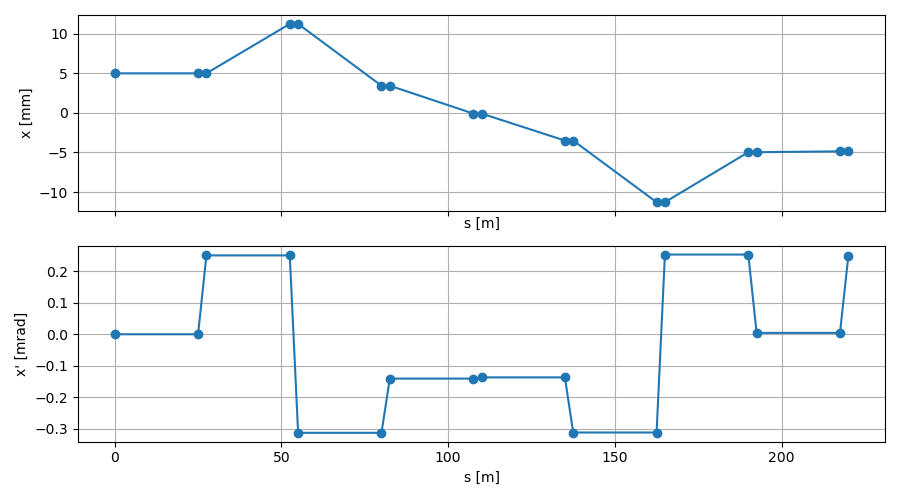

In [2]:
Ms, Ls = getMs('ODOF', repeats=4, f=20, l_d=25, l_q=2.5)
s, X = doTracking(Ms, Ls, N_turns=1, X_0=[5e-3, 0])

fig, axs = subplots(2, sharex=True)
axs[0].plot(s[:, :], X[:, :, 0] * 1000, 'o-')
axs[1].plot(s[:, :], X[:, :, 1] * 1000, 'o-')
axs[0].set_ylabel('x [mm]')
axs[1].set_ylabel('x\' [mrad]')
for ax in axs:
    ax.set_xlabel('s [m]')
fig.tight_layout()

### Q0) Qualitatively, how does the drift region affect `x` and `x'`? How about the quadrupole?

---

  * Gradually increase $N_{turns}$ to 2, 5, 10, 100 turns. 

### Q1) What is the largest displacement the particle attains in the structure?


### Q2) Where in the FODO structure i.e. at the F, D, or O (drift) does this maximum displacement occur?

---

  * Return $N_{turns}$ to 1. 
  * Change the number of cells (`repeats`) to 20.
  * Look at the plot of the trajectory.
  * Adjust the focal length, F, until the parameter `mu` is 90°.
  * Look at the plot of the trajectory.
  

### Q3) How many FODO cells (55 meter units) does it take for the pattern to repeat itself?


### Q4) For what focal length `f` does the phase advance `mu`  equal $60^{\circ}$?


### Q5) How many full cells (55 meter units) does it take for the pattern to repeat itself?  How would you interpret the parameter `mu`?

---

The FODO system will be unstable when |TrM| > 2 or when F < L/2. 

  * Leaving the other parameters alone, set f = 12.499. 
  * Note that the parameter $\mu$ becomes imaginary (and causes a python error)!
  * Look at the particle’s trajectory.

### Q6) If the vacuum chamber is 7 centimeters away from the particle’s ideal orbit, how far will the particle travel before it reaches the chamber wall?

---

## 2. Synchrotron Tune vs. Oscillation Amplitude

The three plots below show angle, trajectory and phase space. As the particle traverses the FODO structure, its position and angle are kept track of and plotted in the phase space plot. 

For $N_{turn}= 1$, follow and understand how the lines in the three plots are related to one another. For each point in the position and angle plot, find the corresponding point in the phase space plot.

### Q7) Print out or make a sketch of the phase space plot and number the dots

Hint: to reduce clutter you can temporarily reduce the number of cells `repeats`.

---

  * Change $N_{turn}$ to 2, 3, 4, 5, 10, and 50 watching the three plots each time. 

### Q8) Print out or make a sketch of this phase space plot and identify with each ellipse its corresponding quadrupole (F or D) and whether it is at the entrance or exit of the magnet

### Q9) What's the significance of the intersection of the elipses at x = +- 5.0 mm?

---


cells: ODOFODOFODOFODOF
mu: 77.36437490697888 deg


<IPython.core.display.Javascript object>


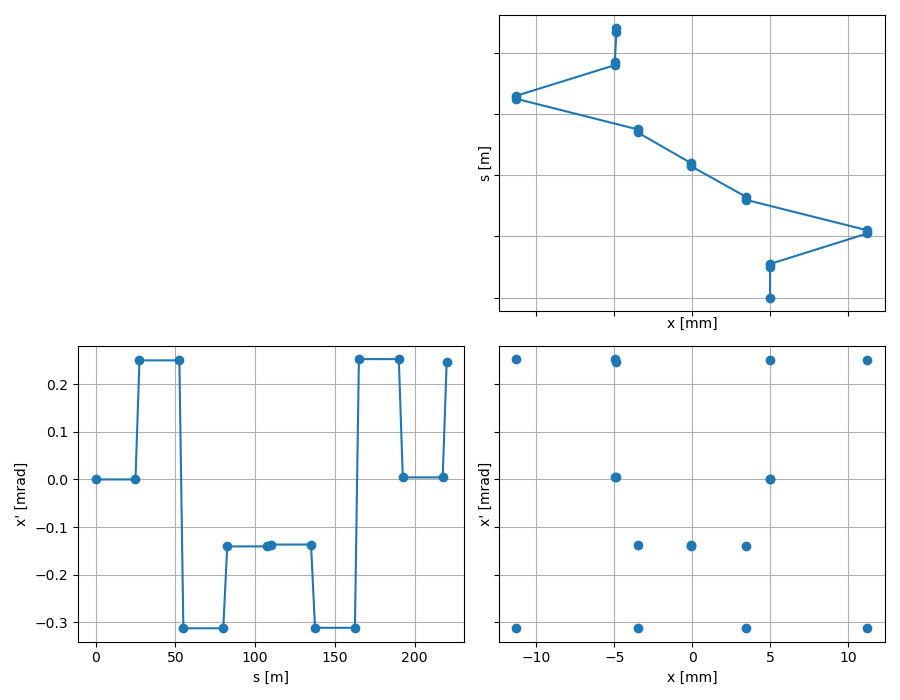

In [3]:
Ms, Ls = getMs('ODOF', repeats=4, l_q=2.5)
s, X = doTracking(Ms, Ls, N_turns=1, X_0=[5e-3, 0])

fig, axs = subplots(2, 2, sharex='col', sharey='row', figsize=(9, 7))

axs[0, 0].remove()

ax = axs[0, 1]
ax.plot(X[:, :, 0] * 1000, s[:, :], 'o-')
ax.set_xlabel('x [mm]')
ax.set_ylabel('s [m]')

ax = axs[1, 0]
ax.plot(s[:, :], X[:, :, 1] * 1000, 'o-')
ax.set_xlabel('s [m]')
ax.set_ylabel('x\' [mrad]')

ax = axs[1, 1]
ax.plot(X[:, :, 0] * 1000, X[:, :, 1] * 1000, 'o')
ax.set_xlabel('x [mm]')
ax.set_ylabel('x\' [mrad]')

fig.tight_layout()

---
## 3. Closed Orbit Error & Correction

Today’s final exercise will be to look at how we can correct for a local orbit distortion. 

In this FODO lattice, `f = 20 m`, `l_d = 25 m` and at specific locations in the structure (initially at index 20, s = 250 m), there is an additional element -- a steering magnet -- which gives the particle an angular deflection of amount $\theta = 0.1$ mrad each time the particle passes by. By looking at the plot of particle displacement, we see that when the particle starts with x = 0 and x’ = 0, it begins a betatron oscillation when it passes by the steering magnet.

However, there is a particular orbit which, if the particle trajectory starts out just right, the orbit will be deflected by the steering magnet but when it returns to the beginning of the accelerator will end up with the same position and slope it started out with. Thus, this particular particle will follow the same path over and over again. 

  * Change $N_{turns}$ from 1 to 2, 5, 10, 50
  * Notice how the particle appears to oscillate about the new closed orbit generated by the steering magnet

Even though the magnet only steers the particle at one location in the accelerator, it can affect the displacement everywhere. 

If f and l are in meters, x in millimeters, and x’ in mrad, then $\theta$ is in mrad (0.1 initially)

cells: FODOFODOFODOFODOFODOFODOFODOFODOFODOFODO
mu: 77.36437490697888 deg


<IPython.core.display.Javascript object>


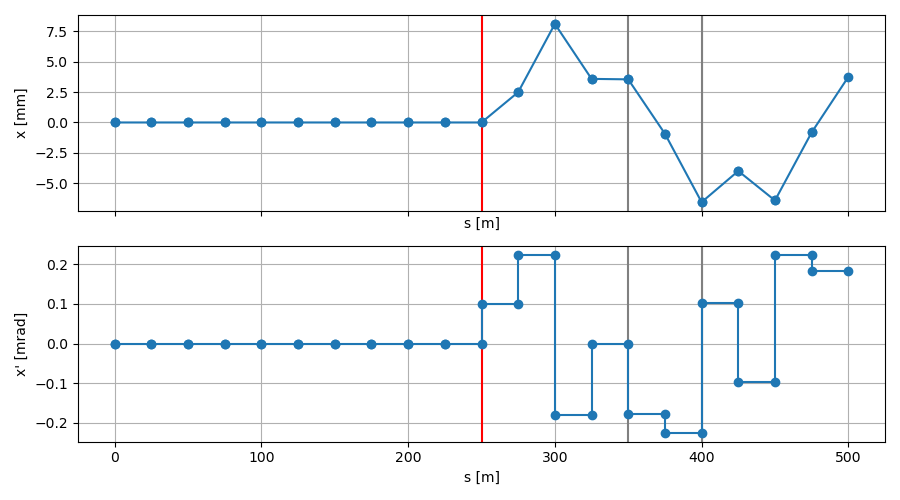

In [4]:
Ms, Ls = getMs(repeats=10)

# Kick position index:
# each half-cell is 25 meter long and consists of 2 elements
# --> advance 25 m for each 2 * index
pk = [
    10 * 2, 
    14 * 2, 
    16 * 2
]

thetas = zeros(len(Ms))
thetas[pk[0]] = 0.100e-3  # theta_1: kick at 250 m
thetas[pk[1]] = 0.000e-3  # theta_2: kick at 350 m
thetas[pk[2]] = 0.000e-3  # theta_3: kick at 400 m

s, X = doTracking(Ms, Ls, N_turns=1, X_0=[0, 0], addKick=thetas)

fig, axs = subplots(2, sharex=True)
for ax in axs:
    ax.set_xlabel('s [m]')
    for p in pk:
        ax.axvline(s[p, 0], color='red' if thetas[p] else 'grey')

axs[0].plot(s[:, :], X[:, :, 0] * 1000, 'o-')
axs[0].set_ylabel('x [mm]')

axs[1].plot(s[:, :], X[:, :, 1] * 1000, 'o-')
axs[1].set_ylabel('x\' [mrad]')
        
fig.tight_layout()

### Q10) What steering error, $\theta_1$ would generate a ~25 mm (1 inch) maximum displacement of the closed orbit in the beam pipe?

---

In addition to a steering “error” being defined at s = 250 m, two steering correctors are defined at locations s = 350 m and s = 400 m. These two are initially set to zero, and the trajectory is plotted.

### Q11) For $\theta_1=0.1$, what values of $\theta_2$ and $\theta_3$ are required to bring the trajectory back to x = 0 and x' = 0?

Carefully adjust the strengths of these two correctors, so that a particle whose trajectory starts with x = 0, x’ = 0 before 250 m ends up with x = 0 and x’ = 0 after 400 m. Check the “closure” of your “orbit bump” by changing $N_{turns}$ to some large value and seeing that the orbit indeed repeats itself.

**Hints:**

  * Make a sketch of the 3 steering magnets and their locations. How would the bumped orbit look like?
  * What particle displacement would you expect at the entrance of the third corrector magnet?
  * What angle error would you expect at the exit of the third corrector magnet?

__
